In [63]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

In [71]:
# constants
hbar = 1
omega = 1
mass = 1
lamb = 1

# discretization
N = 500
x_max = 10
x_list = np.linspace(-x_max, x_max, N)
dx = x_list[1] - x_list[0]

# constants factored out
kineticConstant = -hbar**2 / (2 * mass * dx**2)
potentialConstant = 0.5 * mass * omega**2
perturbationConstant = lamb / 24

# finite difference coefficient into kinetic matrix
main_diag = np.full(N, -2)
off_diag = np.full(N - 1, 1)
kineticMatrix = diags([off_diag, main_diag, off_diag], offsets=[-1, 0, 1])

# potential matrix
potentialMatrix = diags([x_list**2], [0])

# perturbation matrix
perturbation = diags([x_list**4], [0])

# hamiltonian -> H = H0 + Perturbation
H = kineticConstant * kineticMatrix + potentialConstant * potentialMatrix + perturbationConstant * perturbation

# eigenvalues and vectors
numStates = 6
eigenvalues, eigenstates = eigsh(H, k=numStates, which='SM')

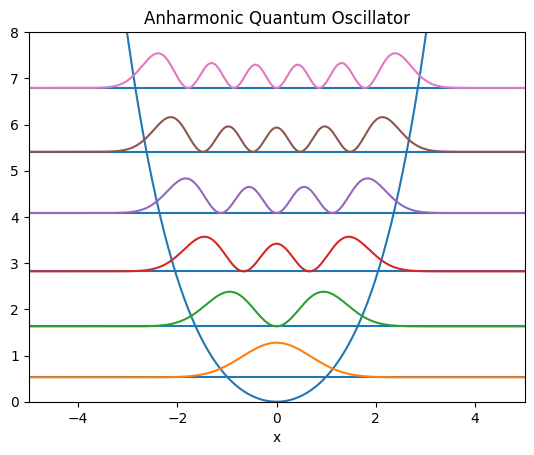

: 

In [ ]:
# plot potential
potential_values = []
for x in x_list:
    potential_values.append(0.5 * mass * omega**2 * x**2 + lamb / 24 * x**4)
plt.ylim(0, 8)
plt.xlim(-5, 5)
plt.plot(x_list, potential_values)

# plot eigenvalues
plt.title("Anharmonic Quantum Oscillator")
plt.xlabel("x")
plt.hlines(y=eigenvalues, xmin=-x_max, xmax=x_max)

for i in range(numStates):
    probability = np.abs(eigenstates[:, i])**2
    probability = probability / probability.max()
    plt.plot(x_list, eigenvalues[i] + 0.75 * probability)

plt.show()

In [66]:
# checking convergence
n_list = np.linspace(10, 500, 50)
for n in n_list:
    # discretization
    N = int(n)
    x_max = 10
    x_list = np.linspace(-x_max, x_max, N)
    dx = x_list[1] - x_list[0]

    # constants factored out
    kineticConstant = -hbar**2 / (2 * mass * dx**2)
    potentialConstant = 0.5 * mass * omega**2
    perturbationConstant = lamb / 24

    # finite difference coefficient into kinetic matrix
    main_diag = np.full(N, -2)
    off_diag = np.full(N - 1, 1)
    kineticMatrix = diags([off_diag, main_diag, off_diag], offsets=[-1, 0, 1])

    # potential matrix
    potentialMatrix = diags([x_list**2], [0])

    # perturbation matrix
    perturbation = diags([x_list**4], [0])

    # hamiltonian -> H = H0 + Perturbation
    H = kineticConstant * kineticMatrix + potentialConstant * potentialMatrix + perturbationConstant * perturbation

    # eigenvalues and vectors
    numStates = 6
    eigenvalues, eigenstates = eigsh(H, k=numStates, which='SM')
    print(f"Eigenvalues for N={n} hilberty space")
    print(eigenvalues)
    print()

Eigenvalues for N=10.0 hilberty space
[ 0.78102762  0.98350694 10.90287062 10.9028913  55.32636124 55.32636124]

Eigenvalues for N=20.0 hilberty space
[0.48510879 1.30400857 2.46438337 2.54790027 6.39222638 6.3923097 ]

Eigenvalues for N=30.0 hilberty space
[0.50953247 1.5273458  2.51351417 3.3842404  4.2825549  4.49496102]

Eigenvalues for N=40.0 hilberty space
[0.51780241 1.57535785 2.65918018 3.73730351 4.78172255 5.76332959]

Eigenvalues for N=50.0 hilberty space
[0.5214785  1.59624729 2.72071393 3.87070915 5.02744733 6.17463742]

Eigenvalues for N=60.0 hilberty space
[0.5234326  1.60725737 2.75280079 3.93931857 5.15152364 6.37694547]

Eigenvalues for N=70.0 hilberty space
[0.52459503 1.61377845 2.77170759 3.97949924 5.22366355 6.4935515 ]

Eigenvalues for N=80.0 hilberty space
[0.52534256 1.61796122 2.78379932 4.00511071 5.26947303 6.56728174]

Eigenvalues for N=90.0 hilberty space
[0.52585163 1.62080505 2.79200523 4.02245593 5.30042735 6.61697946]

Eigenvalues for N=100.0 hilbert